# Project : Building Classification Model for IRIS dataset using ANN

### Business Objective:
The goal of building a classification model for the Iris dataset is to classify iris flowers into one of three species: **Setosa**, **Versicolor**, or **Virginica**, based on the flower's physical characteristics such as sepal length, sepal width, petal length, and petal width.ents.

### Dataset Description:
The Iris dataset contains **150 records** of iris,roblems. Each record has **5 columns**:

1. **Sepal Length** (in cm) — continuous feature.
2. **Sepal Width** (in cm) — continuous feature.
3. **Petal Length** (in cm) — continuous feature.
4. **Petal Width** (in cm) — continuous feature.
5. **Species** — the target variable, with three classes:
   - Setosa (Iris-setosa)
   - Versicolor (Iris-versicolor)
   - Virginica (or any specific analysis?

## Import Necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load Dataset
df = sns.load_dataset("iris")

## EDA (Exploratory Data Analysis)

## Descriptive Analysis

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
df.isna().sum().sum()

0

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   species       149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [10]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.843624,3.059732,3.748993,1.194631
std,0.830851,0.436342,1.767791,0.762622
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.300000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     49
Name: species, dtype: int64

In [12]:
# Label Encoding 
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoded = encoder.fit_transform(df.species)

In [13]:
df["Labels"] = pd.DataFrame(encoded)

In [14]:
df["Labels"][149] = 2.0

In [15]:
df["Labels"].info()

<class 'pandas.core.series.Series'>
Int64Index: 149 entries, 0 to 149
Series name: Labels
Non-Null Count  Dtype  
--------------  -----  
149 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


In [16]:
# split the data into X,Y
X = df.drop(["species","Labels"],axis=1)
Y = df.Labels

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
dtypes: float64(4)
memory usage: 9.9 KB


In [18]:
Y.info()

<class 'pandas.core.series.Series'>
Int64Index: 149 entries, 0 to 149
Series name: Labels
Non-Null Count  Dtype  
--------------  -----  
149 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


## Visualization

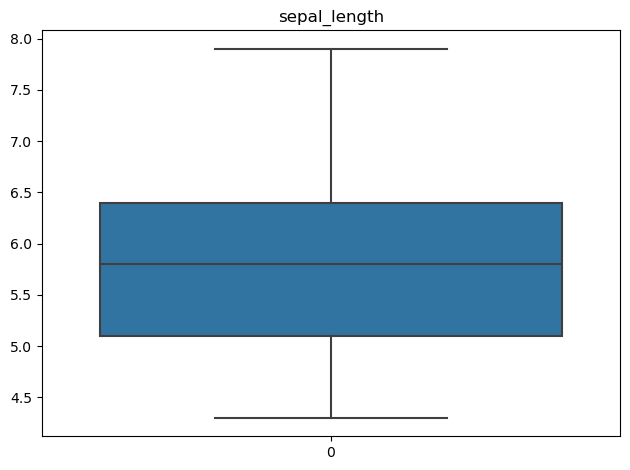

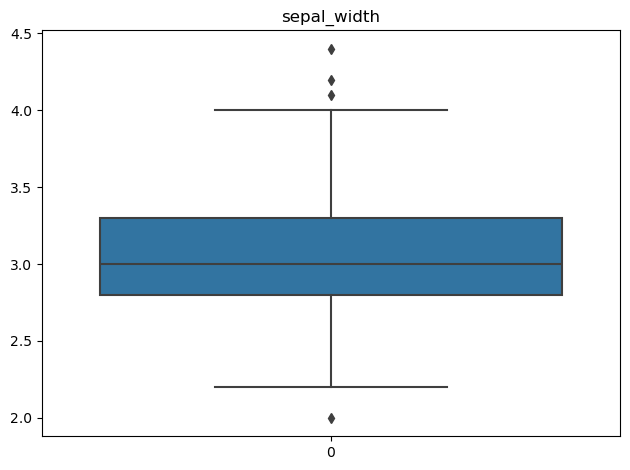

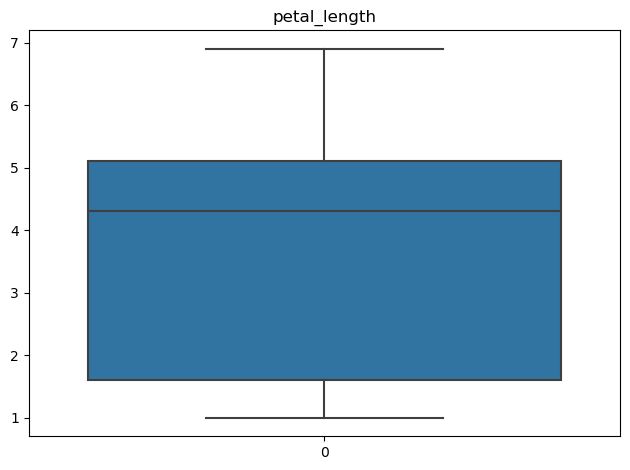

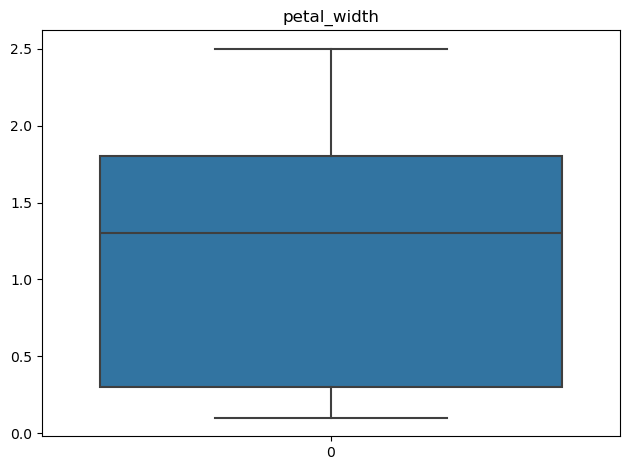

In [19]:
# box plot to know the outliers
columns = X.columns
for column in columns:
    sns.boxplot(df[column])
    plt.title(column)
    plt.tight_layout()
    plt.show()

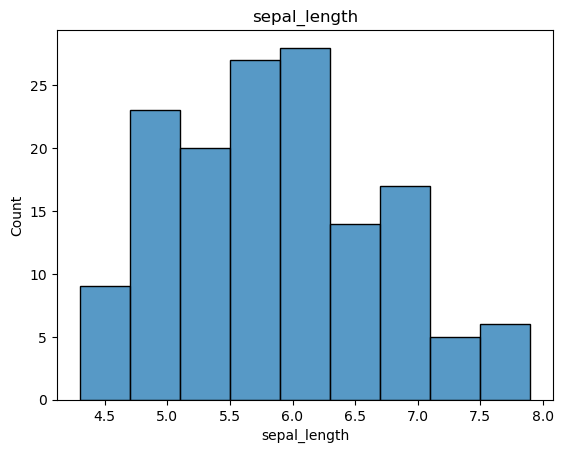

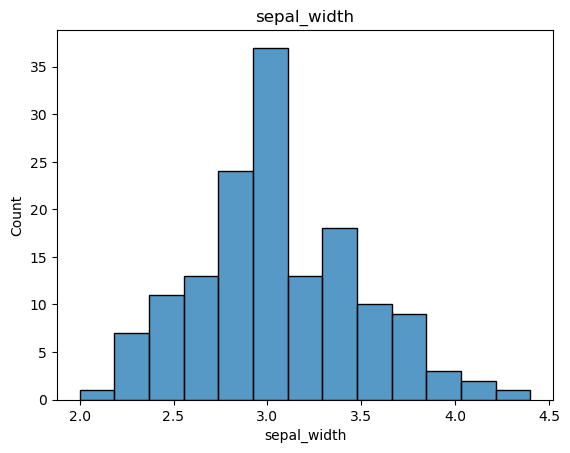

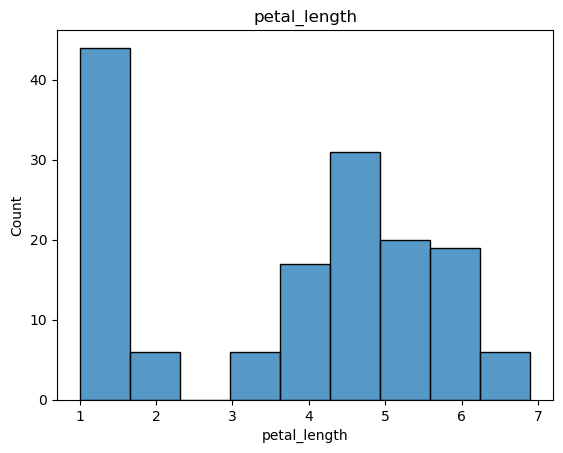

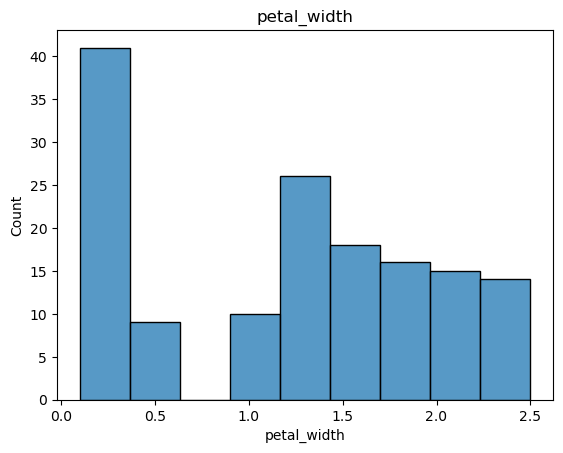

In [20]:
# Histogram
for column in columns:
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

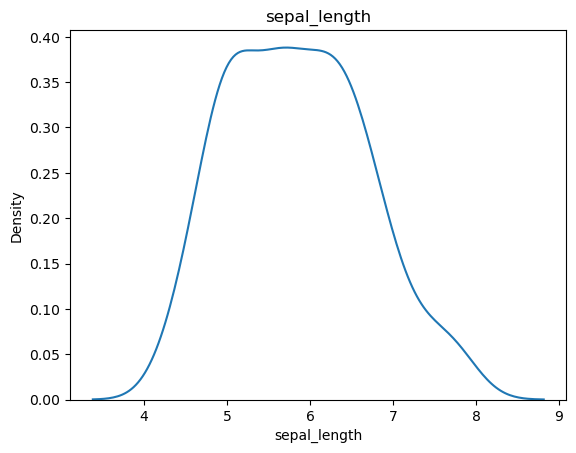

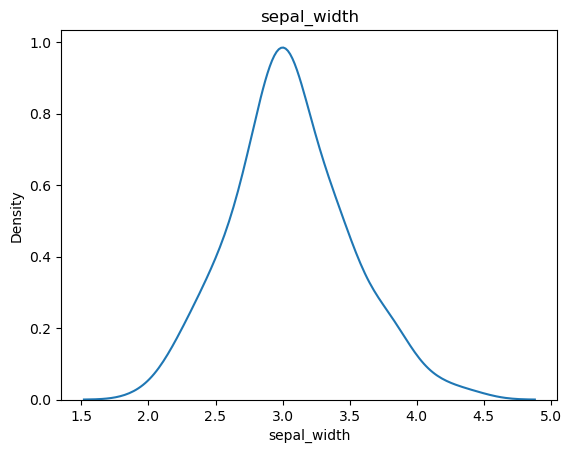

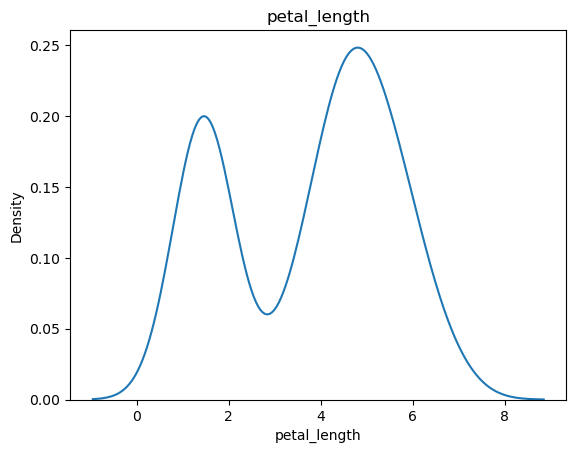

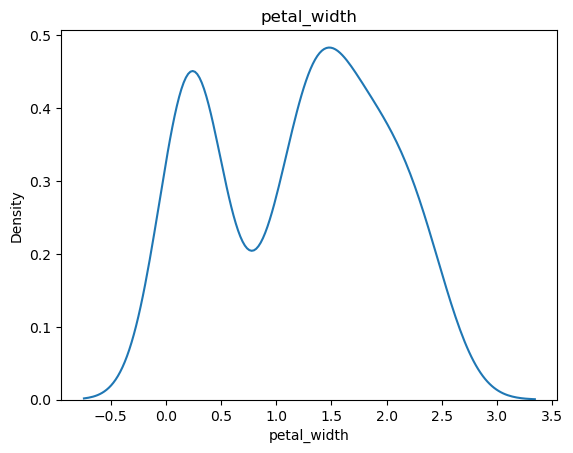

In [21]:
# KDE Plot
for column in columns:
    sns.kdeplot(df[column])
    plt.title(column)
    plt.show()

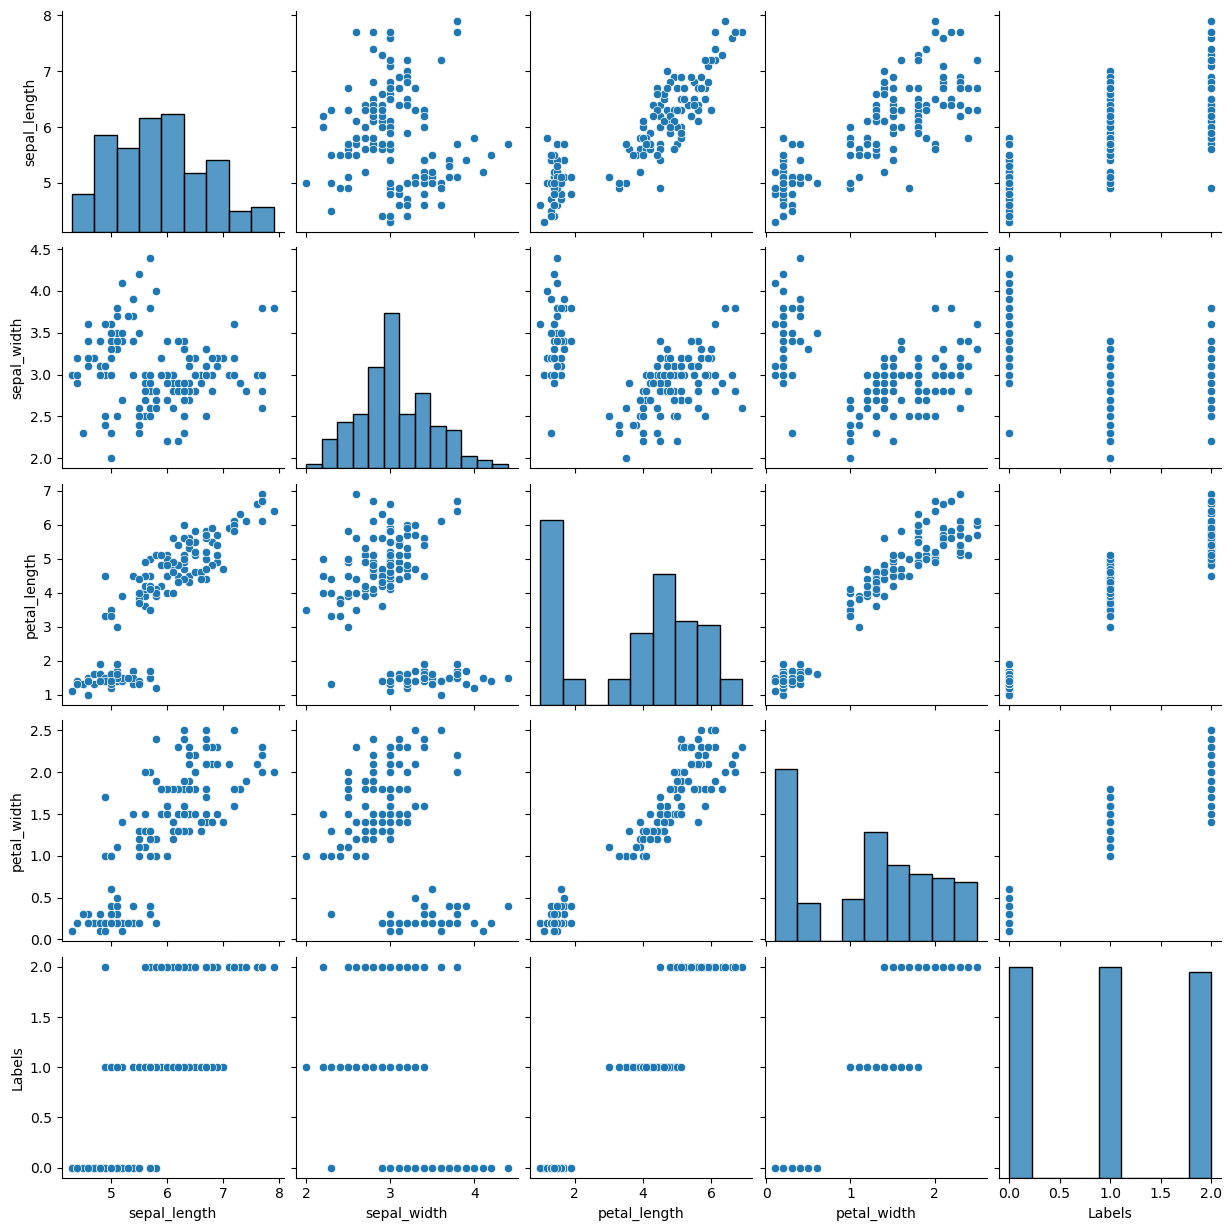

In [22]:
# Pairplot
sns.pairplot(df)

### Standardizing the input variables.

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scaler=StandardScaler()
scaled_df = scaler.fit_transform(X)
X = pd.DataFrame(scaled_df,columns=X.columns)

In [25]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,-0.898033,1.012401,-1.333255,-1.308624
1,-1.139562,-0.137353,-1.333255,-1.308624
2,-1.381091,0.322549,-1.390014,-1.308624
3,-1.501855,0.092598,-1.276496,-1.308624
4,-1.018798,1.242352,-1.333255,-1.308624
...,...,...,...,...
144,1.034197,-0.137353,0.823571,1.454321
145,0.551140,-1.287108,0.710054,0.928046
146,0.792668,-0.137353,0.823571,1.059614
147,0.430375,0.782450,0.937088,1.454321


## Model Building

In [26]:
# Split the data into train and test
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size =0.2, random_state=7)

In [27]:
print(f"train_x : {train_x.shape}")
print(f"train_y : {train_y.shape}")
print(f"test_x : {test_x.shape}")
print(f"test_y : {test_y.shape}")

train_x : (119, 4)
train_y : (119,)
test_x : (30, 4)
test_y : (30,)


## Building a Machine Learning Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
ml_model = RandomForestClassifier(min_samples_split=4,n_estimators=200,max_depth = 3)
ml_model.fit(train_x,train_y)

RandomForestClassifier(max_depth=3, min_samples_split=4, n_estimators=200)

In [30]:
from sklearn.metrics import classification_report

In [31]:
print(classification_report(train_y,ml_model.predict(train_x)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       1.00      0.97      0.99        38
         2.0       0.97      1.00      0.99        38

    accuracy                           0.99       119
   macro avg       0.99      0.99      0.99       119
weighted avg       0.99      0.99      0.99       119



In [32]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 148 to 139
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  30 non-null     float64
 1   sepal_width   30 non-null     float64
 2   petal_length  30 non-null     float64
 3   petal_width   30 non-null     float64
dtypes: float64(4)
memory usage: 1.2 KB


In [33]:
test_y.info()

<class 'pandas.core.series.Series'>
Int64Index: 30 entries, 149 to 139
Series name: Labels
Non-Null Count  Dtype  
--------------  -----  
30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes


In [34]:
print(classification_report(test_y,ml_model.predict(test_x)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.83      0.83      0.83        12
         2.0       0.82      0.82      0.82        11

    accuracy                           0.87        30
   macro avg       0.88      0.88      0.88        30
weighted avg       0.87      0.87      0.87        30



# Building ANN Model

In [35]:
import keras
from keras.models import Sequential
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Dense

In [36]:
classifier = Sequential()

In [37]:
classifier.add(Dense(units=6,kernel_initializer = "he_uniform",activation="relu",input_dim = 4))
classifier.add(Dense(units=6, kernel_initializer ="he_uniform" ,activation="relu"))
classifier.add(Dense(units=3,kernel_initializer = "glorot_uniform",activation ="softmax"))
classifier.compile(optimizer = "adamax",loss="categorical_crossentropy",metrics=["accuracy"])

In [38]:
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 6)                   │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │              21 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93 (372.00 B)

 Trainable params: 93 (372.00 B)

 Non-trainable params: 0 (0.00 B)

In [39]:
from keras.utils import to_categorical

train_y_encoded = to_categorical(train_y, num_classes=3)
test_y_encoded = to_categorical(test_y,num_classes=3)


In [40]:
model_history = classifier.fit(train_x,train_y_encoded,validation_split=0.2,batch_size=10,epochs = 100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - accuracy: 0.3236 - loss: 1.1405 - val_accuracy: 0.3333 - val_loss: 1.0949
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.4220 - loss: 1.0845 - val_accuracy: 0.3750 - val_loss: 1.0722
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3589 - loss: 1.0912 - val_accuracy: 0.4167 - val_loss: 1.0525
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.3986 - loss: 1.0930 - val_accuracy: 0.5000 - val_loss: 1.0336
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6279 - loss: 1.0334 - val_accuracy: 0.5417 - val_loss: 1.0137
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5711 - loss: 1.0424 - val_accuracy: 0.5417 - val_loss: 0.9959
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6139 - loss: 1.0080 - val_accuracy: 0.5417 - val_loss: 0.9794
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6380 - loss: 0.9982 - val_accuracy: 0.

In [41]:
print(model_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


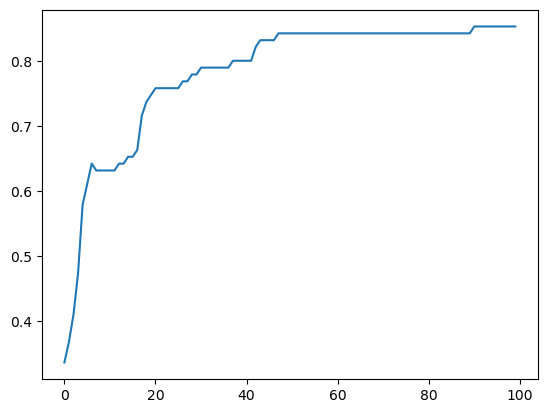

In [42]:
plt.plot(model_history.history["accuracy"])

In [43]:
test_predictions = classifier.predict(test_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


In [44]:
predictions = np.argmax(test_predictions, axis=1)


In [45]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

         0.0       1.00      0.86      0.92         7
         1.0       0.47      0.58      0.52        12
         2.0       0.44      0.36      0.40        11

    accuracy                           0.57        30
   macro avg       0.64      0.60      0.61        30
weighted avg       0.58      0.57      0.57        30



#  Using Keras Tuner for Hyper Parameter Tuning

In [46]:
!pip install keras_tuner

In [47]:
from keras_tuner import RandomSearch
from keras import layers

In [48]:
def build_model(hp):
    model = Sequential()
    for i in range(hp.Int("num_layers",1,20)):
        model.add(layers.Dense(units=hp.Int("units_"+str(i),min_value=3,max_value=100,step=20),activation="relu"))
    model.add(layers.Dense(units=3,activation="softmax"))
    model.compile(
    optimizer =keras.optimizers.Adam(
    hp.Choice("learning_rate",[1e-1,1e-2,1e-3,1e-4])),
    loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

In [49]:
Tuner = RandomSearch(
    build_model,
    objective =  "val_accuracy",
    max_trials = 10,
    executions_per_trial=5,
    directory="model_weights",
    project_name="iris classifier" )

Reloading Tuner from model_weights\iris classifier\tuner0.json


In [50]:
Tuner.search(train_x,train_y_encoded,epochs=50,batch_size=10,validation_data=(test_x,test_y_encoded),verbose=1)

In [51]:
Tuner.results_summary()

Results summary
Results in model_weights\iris classifier
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
num_layers: 2
units_0: 63
learning_rate: 0.1
units_1: 43
units_2: 83
units_3: 23
units_4: 23
units_5: 63
units_6: 43
units_7: 3
units_8: 43
units_9: 3
units_10: 3
units_11: 23
units_12: 83
units_13: 63
units_14: 63
units_15: 23
Score: 0.9333333253860474

Trial 03 summary
Hyperparameters:
num_layers: 5
units_0: 83
learning_rate: 0.01
units_1: 23
units_2: 3
units_3: 83
units_4: 83
units_5: 3
units_6: 43
units_7: 43
units_8: 23
units_9: 83
units_10: 83
units_11: 63
units_12: 63
units_13: 63
units_14: 3
Score: 0.9266666650772095

Trial 08 summary
Hyperparameters:
num_layers: 14
units_0: 43
learning_rate: 0.0001
units_1: 83
units_2: 43
units_3: 83
units_4: 23
units_5: 83
units_6: 3
units_7: 83
units_8: 63
units_9: 23
units_10: 43
units_11: 83
units_12: 83
units_13: 83
units_14: 3
units_15: 63
units_16: 63
units_17: 43
Score: 0.820

In [52]:
best_model= Tuner.get_best_models(num_models=1)[0]

In [53]:
best_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 63)                  │             315 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 43)                  │           2,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 3)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,199 (12.50 KB)

 Trainable params: 3,199 (12.50 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
test_predictions=best_model.predict(test_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step


In [55]:
predictions = np.argmax(test_predictions,axis=1)

In [56]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.92      1.00      0.96        12
         2.0       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [57]:
from sklearn.metrics import accuracy_score
print(accuracy_score(test_y,predictions)*100)

96.66666666666667


In [58]:
train_predictions = best_model.predict(train_x)
train_predictions = np.argmax(train_predictions,axis=1)
print(classification_report(train_y,train_predictions))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        43
         1.0       0.97      0.97      0.97        38
         2.0       0.97      0.97      0.97        38

    accuracy                           0.98       119
   macro avg       0.98      0.98      0.98       119
weighted avg       0.98      0.98      0.98       119



In [59]:
# Testing with new datapoint
input_data = {
    "sepal_length":[5.1],
    "sepal_width":[3.5],
    "petal_length":[1.4],
    "petal_width":[0.2]}
input_x = pd.DataFrame(input_data)
input = scaler.transform(input_x)
input = pd.DataFrame(input,columns=input_x.columns)

prediction = best_model.predict(input_x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [60]:
prediction

array([[0.27668834, 0.66007227, 0.06323942]], dtype=float32)

In [61]:
prediction_class_index = np.argmax(prediction,axis=1)
prediction_class_index

array([1], dtype=int64)

In [62]:
label = encoder.inverse_transform(prediction_class_index)

In [63]:
print(label[0])

versicolor


In [64]:
def predict(data):
    if len(data) == 4:
        input = pd.DataFrame(data)
        prediction = best_model.predict(input)
        prediction_class = np.argmax(prediction,axis=1)
        predicted_class = encoder.inverse_transform(prediction_class)
        return predicted_class[0]
    else:
        return None


In [65]:
prediction = predict(input_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [66]:
print(prediction)

versicolor


## Training the model with total dataset

In [67]:
X.info(),Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
<class 'pandas.core.series.Series'>
Int64Index: 149 entries, 0 to 149
Series name: Labels
Non-Null Count  Dtype  
--------------  -----  
149 non-null    float64
dtypes: float64(1)
memory usage: 6.4 KB


(None, None)

In [68]:
Y_encoded = to_categorical(Y, num_classes=3)

In [69]:
Y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [70]:
best_model.fit(X,Y_encoded)

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9615 - loss: 0.1692


# Saving the model

In [75]:
best_model.save("model.h5")

In [76]:
import joblib
joblib.dump(encoder,"encoder.pkl")

['encoder.pkl']

In [77]:
joblib.dump(scaler,"scaler.pkl")

['scaler.pkl']

In [78]:
df.sample(20)

,sepal_length,sepal_width,petal_length,petal_width,species,Labels
130,7.4,2.8,6.1,1.9,virginica,2.0
41,4.5,2.3,1.3,0.3,setosa,0.0
95,5.7,3.0,4.2,1.2,versicolor,1.0
5,5.4,3.9,1.7,0.4,setosa,0.0
112,6.8,3.0,5.5,2.1,virginica,2.0
134,6.1,2.6,5.6,1.4,virginica,2.0
149,5.9,3.0,5.1,1.8,virginica,2.0
43,5.0,3.5,1.6,0.6,setosa,0.0
12,4.8,3.0,1.4,0.1,setosa,0.0
80,5.5,2.4,3.8,1.1,versicolor,1.0


In [74]:
print(3)

3
